In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np

In [2]:
matplotlib inline

In [3]:
simulator = Aer.get_backend('qasm_simulator')

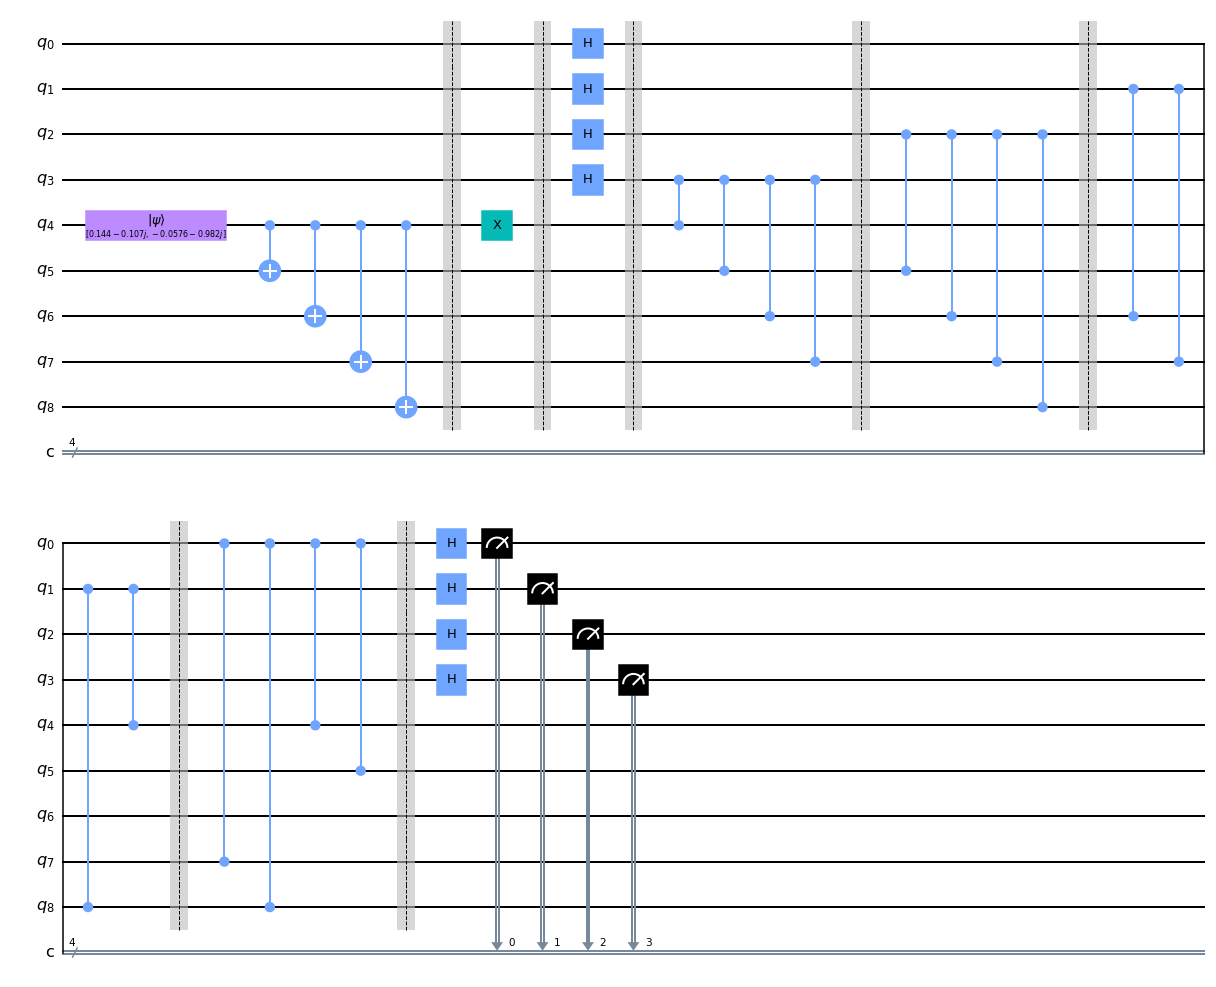

In [49]:
# Quantum error correction protocol
circuit = QuantumCircuit(9, 4)

# q4 has the state psi
psi = quantum_info.random_statevector(2)
circuit.initialize(psi.data, 4)

# Encoding the codeword. Note that codeword qbit 0 id q4, codeword qbit 5 is q5.
circuit.cx(4, 5)
circuit.cx(4, 6)
circuit.cx(4, 7)
circuit.cx(4, 8)
circuit.barrier()

# Introducing Errors
err = [4]
circuit.x(err)


# Correction with the stabilizer from the lecture slides
circuit.barrier()
circuit.h([0, 1, 2, 3])
circuit.barrier()
# M0
circuit.cz(4, 3)
circuit.cz(5, 3)
circuit.cz(6, 3)
circuit.cz(7, 3)
circuit.barrier()
#M1
circuit.cz(5, 2)
circuit.cz(6, 2)
circuit.cz(7, 2)
circuit.cz(8, 2)
circuit.barrier()
#M2
circuit.cz(6, 1)
circuit.cz(7, 1)
circuit.cz(8, 1)
circuit.cz(4, 1)
circuit.barrier()
#M3
circuit.cz(7, 0)
circuit.cz(8, 0)
circuit.cz(4, 0)
circuit.cz(5, 0)
circuit.barrier()
circuit.h([0, 1, 2, 3])

circuit.measure([0,1,2,3],[0,1,2,3])
circuit.draw(output='mpl')

{'1011': 1000}
dict_keys(['1011'])
['1011']


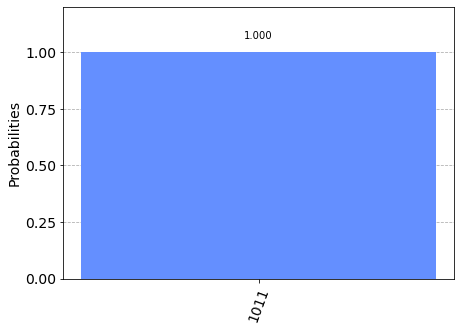

In [50]:
result = execute(circuit, backend = simulator, shots=1000).result()
counts = result.get_counts()

print(counts)
print(counts.keys())
print(list(counts.keys()))
plot_histogram(counts)

In [53]:
# Using the circuit from before and solving the error syndromes for each possible configuration of Xi and XiXj

operators = []
syndromes = []

for j in range(6):
    for i in range(5):
        # Quantum error correction protocol
        circuit = QuantumCircuit(9, 4)
        
        # q4 has the state psi
        psi = quantum_info.random_statevector(2)
        circuit.initialize(psi.data, 4)

        # Encoding the codeword. Note that codeword qbit 0 id q4, codeword qbit 5 is q5.
        circuit.cx(4, 5)
        circuit.cx(4, 6)
        circuit.cx(4, 7)
        circuit.cx(4, 8)
        circuit.barrier()
        
        # Introducing Errors
        if j == 0:
            err = [i+4]
            operators.append('[i=' + str(i)+']')
        else:
            err = [i+4, j+3]
            operators.append('[i=' + str(i)+' j='+str(j-1)+']')
        circuit.x(err)
        
        # Correction with the stabilizer from the lecture slides
        circuit.barrier()
        circuit.h([0, 1, 2, 3])
        circuit.barrier()
        # M0
        circuit.cz(4, 3)
        circuit.cz(5, 3)
        circuit.cz(6, 3)
        circuit.cz(7, 3)
        circuit.barrier()
        #M1
        circuit.cz(5, 2)
        circuit.cz(6, 2)
        circuit.cz(7, 2)
        circuit.cz(8, 2)
        circuit.barrier()
        #M2
        circuit.cz(6, 1)
        circuit.cz(7, 1)
        circuit.cz(8, 1)
        circuit.cz(4, 1)
        circuit.barrier()
        #M3
        circuit.cz(7, 0)
        circuit.cz(8, 0)
        circuit.cz(4, 0)
        circuit.cz(5, 0)
        circuit.barrier()
        circuit.h([0, 1, 2, 3])
        
        circuit.measure([0,1,2,3],[0,1,2,3])
        circuit.draw(output='mpl')
        result = execute(circuit, backend = simulator, shots=1000).result()
        syndromes.append(list(result.get_counts().keys()))
        
# Printing the syndromes, starting with one Xi and going from there.
print(operators)
print(syndromes)

['[i=0]', '[i=1]', '[i=2]', '[i=3]', '[i=4]', '[i=0 j=0]', '[i=1 j=0]', '[i=2 j=0]', '[i=3 j=0]', '[i=4 j=0]', '[i=0 j=1]', '[i=1 j=1]', '[i=2 j=1]', '[i=3 j=1]', '[i=4 j=1]', '[i=0 j=2]', '[i=1 j=2]', '[i=2 j=2]', '[i=3 j=2]', '[i=4 j=2]', '[i=0 j=3]', '[i=1 j=3]', '[i=2 j=3]', '[i=3 j=3]', '[i=4 j=3]', '[i=0 j=4]', '[i=1 j=4]', '[i=2 j=4]', '[i=3 j=4]', '[i=4 j=4]']
[['1011'], ['1101'], ['1110'], ['1111'], ['0111'], ['0000'], ['0110'], ['0101'], ['0100'], ['1100'], ['0110'], ['0000'], ['0011'], ['0010'], ['1010'], ['0101'], ['0011'], ['0000'], ['0001'], ['1001'], ['0100'], ['0010'], ['0001'], ['0000'], ['1000'], ['1100'], ['1010'], ['1001'], ['1000'], ['0000']]


In [59]:
# Printing the syndromes in the lecture slides, [i + (j+1)*5]
print(syndromes[0 + 0*5])
print(syndromes[1 + 0*5])
print(syndromes[3 + 0*5])
print(syndromes[4 + 0*5])
print(syndromes[0 + 2*5])
print(syndromes[0 + 3*5])
print(syndromes[0 + 4*5])
print(syndromes[0 + 5*5])
print(syndromes[1 + 3*5])
print(syndromes[1 + 4*5])
print(syndromes[1 + 5*5])
print(syndromes[2 + 4*5])
print(syndromes[2 + 5*5])
print(syndromes[3 + 5*5])

['1011']
['1101']
['1111']
['0111']
['0110']
['0101']
['0100']
['1100']
['0011']
['0010']
['1010']
['0001']
['1001']
['1000']


In [60]:
# If 1 = - and 0 = +, these fit the syndromes in the lecture notes, with the exeption of the last one. I dont know if it is
# An error in the notes or in the code.